In [1]:
# Util.py
import util
from util import convert_database, convert_image, take_image, pairing_image, predict, sort_path, predict

#Tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

#Flask
from flask import Flask, request, jsonify, render_template

In [2]:
# Import saved model
model = load_model('my_h5_model.h5', custom_objects={'DistanceLayer' : util.DistanceLayer})

In [17]:
# Initialize Flask server with error handling
app = Flask(__name__)

@app.route('/', methods = ["GET", "POST"])
def home():
    if request.method == "GET":
        return render_template('upload.html')
    elif request.method == "POST":
        image = request.files.get('file')
        try:
            image_path = "F:/ml-api/images/" + image.filename
            image.save(image_path)

            # Transform test image from request
            test_image = convert_image(image_path)
            
            # Ini diubah sesuai alamat database
            database, paths = convert_database('F:/ml-api/database_wajah/')

            # Make a pair
            n_images = len(database) # Untuk menghitung banyaknya images di database
            paired_images = pairing_image(test_image, database, n_images)

            # Prediction
            path_to_csv = "F:\ml-api\identitas.csv"
            pred = predict(model, paired_images, n_images, paths, path_to_csv)
            return pred
        except Exception as e:
            return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run(debug=True, use_reloader = False, port = 5000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Jun/2022 10:47:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2022 10:47:56] "GET /static/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [12/Jun/2022 10:48:00] "POST / HTTP/1.1" 200 -


In [8]:
a = convert_image("https://storage.googleapis.com/get-people-model-project/sampel.png")

In [6]:
import matplotlib.pyplot as plt

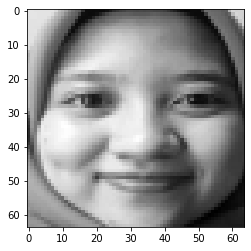

In [10]:
plt.imshow(a, cmap="gray")

In [5]:
# # IMPORT REQUIRED LIBRARIES
from flask import Flask, request
from flask_sqlalchemy import SQLAlchemy
from sqlalchemy import create_engine, MetaData, Table, Column, Numeric,insert, Integer, VARCHAR, update, text, delete
from sqlalchemy.engine import result

In [8]:
import pymysql

In [ ]:
# # IMPORT REQUIRED LIBRARIES
# from flask import Flask, request
# from flask_sqlalchemy import SQLAlchemy
#from sqlalchemy import create_engine, MetaData, Table, Column, Numeric,insert, Integer, VARCHAR, update, text, delete
#from sqlalchemy.engine import result

engine = create_engine("mysql+pymysql://root:@localhost/db_get_people")
connection = engine.connect()
metadata = db.MetaData()
victims = db.Table('victims', metadata, autoload=True, autoload_with=engine)

  

path = ['https://storage.googleapis.com/get-people-model-project/database_wajah/1.png', 'https://storage.googleapis.com/get-people-model-project/database_wajah/2.png', 'https://storage.googleapis.com/get-people-model-project/database_wajah/11.jpeg', 'https://storage.googleapis.com/get-people-model-project/database_wajah/12.png']

a = []
for i in range(4):
	query = db.select([victims]).where(victims.columns.image == path[i])
	print(query)
	# ResultProxy = connection.execute(query)
	# ResultSet = ResultProxy.fetchall()
	# a.append(ResultSet)
	# print(a)
	# for data in ResultSet:
	# 	print(data)

In [13]:
text('a')

In [10]:
for item in path:
    print(item)

https://storage.googleapis.com/get-people-model-project/database_wajah/1.png
https://storage.googleapis.com/get-people-model-project/database_wajah/2.png
https://storage.googleapis.com/get-people-model-project/database_wajah/11.jpeg
https://storage.googleapis.com/get-people-model-project/database_wajah/12.png


In [ ]:
db.select([victims]).where(victims.columns.image IN tuple(path))

In [11]:
tuple(path)

('https://storage.googleapis.com/get-people-model-project/database_wajah/1.png',
 'https://storage.googleapis.com/get-people-model-project/database_wajah/2.png',
 'https://storage.googleapis.com/get-people-model-project/database_wajah/11.jpeg',
 'https://storage.googleapis.com/get-people-model-project/database_wajah/12.png')

In [16]:
a = (('53a8f0d0-14ab-4c82-b937-5e853447b803', 'https://storage.googleapis.com/get-people-model-project/database_wajah/4.png', 'Kemayoran', '085233225979', 'Yuli Permatasari', 'Perempuan', 'Malang', '05/05/2001', 'Hana Puspita', '4827034505010003', datetime.datetime(2022, 6, 12, 8, 13, 3), datetime.datetime(2022, 6, 12, 8, 13, 3)), ('8538c280-b957-4738-91a5-5605b9665ae1', 'https://storage.googleapis.com/get-people-model-project/database_wajah/2.png', 'Tanah Abang', '085233225979', 'Kurniyatul Ainiyah', 'Perempuan', 'Sampang', '12/09/2001', 'Ratih Darminah', '3518035209010008', datetime.datetime(2022, 6, 12, 8, 15, 10), datetime.datetime(2022, 6, 12, 8, 15, 10)), ('c566873a-cb05-4143-a98a-863fa2971b0d', 'https://storage.googleapis.com/get-people-model-project/database_wajah/1.png', 'Gambir', '085233225979', 'Yoga Pramudana', 'Laki-Laki', 'Pamekasan', '24/05/2001', 'Endang Kusumaningsih', '3528042405010007', datetime.datetime(2022, 6, 12, 8, 19, 12), datetime.datetime(2022, 6, 12, 8, 19, 12)), ('fff56c47-5b79-4a48-9b68-7e954449a91f', 'https://storage.googleapis.com/get-people-model-project/database_wajah/3.png', 'Tanah Abang', '085233225979', 'Fara Pertiwi', 'Perempuan', 'Malang', '28/06/2001', 'Elok Widyawati', '4529036806010004', datetime.datetime(2022, 6, 12, 8, 16, 56), datetime.datetime(2022, 6, 12, 8, 16, 56)))

NameError: name 'datetime' is not defined

In [48]:
rs = (('Nia', '17 Agustus', 'Malang'), ('Ori', '1 Januari', 'Jakarta'))
rs = [list(i) for i in list(rs)]
hmm = {}
for i in range(len(rs)):
    hmm[i] = list(rs)[i]

In [49]:
print(hmm)
print(hmm[0])

{0: ['Nia', '17 Agustus', 'Malang'], 1: ['Ori', '1 Januari', 'Jakarta']}
['Nia', '17 Agustus', 'Malang']


In [5]:
image_path = "F:/ml-api/images/" + "5.jpg"

# Transform test image from request
test_image = convert_image('https://storage.googleapis.com/get-people-model-project/database_wajah/1.png')

# Ini diubah sesuai alamat database
database, paths = convert_database('')

# Make a pair
n_images = len(database) # Untuk menghitung banyaknya images di database
paired_images = pairing_image(test_image, database, n_images)

# Prediction
pred = predict(model, paired_images, n_images, paths, path_to_csv)

ValueError: unknown url type: 'F'

In [ ]:
pred